In [1]:
import pandas as pd

# Use the provided file path
file_path = 'C:\\Users\\snarc\\Documents\\Disease-Incidence-Analysis-2001-2022\\Infectious Diseases by disease, county, year and sex.csv'

# Load the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

        Disease   County  Year     Sex  Cases  Population Rate  Lower_95__CI  \
0  Anaplasmosis  Alameda  2001  Female    0.0      746596    -           0.0   
1  Anaplasmosis  Alameda  2001    Male    0.0      718968    -           0.0   
2  Anaplasmosis  Alameda  2001   Total    0.0     1465564    -           0.0   
3  Anaplasmosis  Alameda  2002  Female    0.0      747987    -           0.0   
4  Anaplasmosis  Alameda  2002    Male    0.0      720481    -           0.0   

   Upper_95__CI  
0         0.494  
1         0.513  
2         0.252  
3         0.493  
4         0.512  


In [2]:
# Display information about the dataset
print(data.info())
# Display the first few rows
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189921 entries, 0 to 189920
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Disease       189921 non-null  object 
 1   County        189921 non-null  object 
 2   Year          189921 non-null  int64  
 3   Sex           189921 non-null  object 
 4   Cases         185167 non-null  float64
 5   Population    189921 non-null  int64  
 6   Rate          189921 non-null  object 
 7   Lower_95__CI  184650 non-null  float64
 8   Upper_95__CI  184650 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 13.0+ MB
None
        Disease   County  Year     Sex  Cases  Population Rate  Lower_95__CI  \
0  Anaplasmosis  Alameda  2001  Female    0.0      746596    -           0.0   
1  Anaplasmosis  Alameda  2001    Male    0.0      718968    -           0.0   
2  Anaplasmosis  Alameda  2001   Total    0.0     1465564    -           0.0   
3  Anaplasmosis  A

In [3]:
# Display data types and missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189921 entries, 0 to 189920
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Disease       189921 non-null  object 
 1   County        189921 non-null  object 
 2   Year          189921 non-null  int64  
 3   Sex           189921 non-null  object 
 4   Cases         185167 non-null  float64
 5   Population    189921 non-null  int64  
 6   Rate          189921 non-null  object 
 7   Lower_95__CI  184650 non-null  float64
 8   Upper_95__CI  184650 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 13.0+ MB
None


In [4]:
# Display summary statistics
print(data.describe(include='all'))

             Disease   County           Year     Sex          Cases  \
count         189921   189921  189921.000000  189921  185167.000000   
unique            52       59            NaN       3            NaN   
top     Anaplasmosis  Alameda            NaN  Female            NaN   
freq            3894     3219            NaN   63307            NaN   
mean             NaN      NaN    2011.803355     NaN      10.964783   
std              NaN      NaN       6.350271     NaN     148.355711   
min              NaN      NaN    2001.000000     NaN       0.000000   
25%              NaN      NaN    2006.000000     NaN       0.000000   
50%              NaN      NaN    2012.000000     NaN       0.000000   
75%              NaN      NaN    2017.000000     NaN       0.000000   
max              NaN      NaN    2022.000000     NaN   10016.000000   

          Population    Rate   Lower_95__CI   Upper_95__CI  
count   1.899210e+05  189921  184650.000000  184650.000000  
unique           NaN   13

In [5]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)
# Example: Fill missing values with 0 in specific columns
data['Cases'].fillna(0, inplace=True)
print(data.columns)
data['Lower_95__CI'].fillna(0, inplace=True)
data['Upper_95__CI'].fillna(0, inplace=True)

Missing values in each column:
 Disease            0
County             0
Year               0
Sex                0
Cases           4754
Population         0
Rate               0
Lower_95__CI    5271
Upper_95__CI    5271
dtype: int64
Index(['Disease', 'County', 'Year', 'Sex', 'Cases', 'Population', 'Rate',
       'Lower_95__CI', 'Upper_95__CI'],
      dtype='object')


C:\Users\snarc\AppData\Local\Temp\ipykernel_6640\1757002014.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Cases'].fillna(0, inplace=True)
C:\Users\snarc\AppData\Local\Temp\ipykernel_6640\1757002014.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [6]:
# Alternatively, you could fill with mean/median:
# data['Cases'].fillna(data['Cases'].mean(), inplace=True)
# Check for duplicates
duplicate_rows = data.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


In [9]:
# Remove duplicate rows if any
data.drop_duplicates(inplace=True)
# Example: Fill missing values with 0 in specific columns
data['Cases'] = data['Cases'].fillna(0)
if 'Lower_95__CI' in data.columns:
    data['Lower_95__CI'] = data['Lower_95__CI'].fillna(0)
else:
    print("Column 'Lower__95_CI' not found in the dataset.")

In [10]:
# Convert the Year column to datetime (if it's a date)
# Assuming the Year column is numeric but should be a date
# Uncomment the line below if you want to convert
# data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data['Lower_95__CI'] = data.get('Lower_95__CI', pd.Series([0]*len(data)))
print(data.columns)
print("Columns in data:", data.columns)
# Safely fill NaNs in 'Lower_95_CI' if it exists, otherwise create the column with 0s
data['Lower_95__CI'] = data.get('Lower_95__CI', pd.Series([0] * len(data)))
# Ensure 'Cases' column exists and fill NaNs if it does
if 'Cases' in data.columns:
    data['Cases'] = data['Cases'].fillna(0)
else:
    print("Column 'Cases' not found in the dataset.")

Index(['Disease', 'County', 'Year', 'Sex', 'Cases', 'Population', 'Rate',
       'Lower_95__CI', 'Upper_95__CI'],
      dtype='object')
Columns in data: Index(['Disease', 'County', 'Year', 'Sex', 'Cases', 'Population', 'Rate',
       'Lower_95__CI', 'Upper_95__CI'],
      dtype='object')


In [11]:
# Ensure 'Lower_95_CI' column exists before filling NaNs
if 'Lower_95__CI' in data.columns:
    data['Lower_95__CI'] = data['Lower_95__CI'].fillna(0)
else:
    print("Column 'Lower_95__CI' not found in the dataset.")

In [12]:
import pandas as pd

# Load the CSV file
file_path = 'C:\\Users\\snarc\\Documents\\Disease-Incidence-Analysis-2001-2022\\Infectious Diseases by disease, county, year and sex.csv'
data = pd.read_csv(file_path)

# Get the number of attributes (columns) and records (rows)
num_attributes = data.shape[1]
num_records = data.shape[0]

print("Number of attributes (columns):", num_attributes)
print("Number of records (rows):", num_records)

Number of attributes (columns): 9
Number of records (rows): 189921


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace with your file path)
data = pd.read_csv('Infectious Diseases by disease, county, year and sex.csv')

In [14]:
# Preview the first few rows
data.head()
# Get basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189921 entries, 0 to 189920
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Disease       189921 non-null  object 
 1   County        189921 non-null  object 
 2   Year          189921 non-null  int64  
 3   Sex           189921 non-null  object 
 4   Cases         185167 non-null  float64
 5   Population    189921 non-null  int64  
 6   Rate          189921 non-null  object 
 7   Lower_95__CI  184650 non-null  float64
 8   Upper_95__CI  184650 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 13.0+ MB


In [15]:
# Get basic statistics (e.g., mean, median) for numerical columns
data.describe()

# Check for missing values
data.isnull().sum()
# Drop rows with missing values
data = data.dropna()

# Remove duplicate rows
data = data.drop_duplicates()

# Standardize column names (e.g., making them lowercase)
data.columns = data.columns.str.lower()
# Group data by year and get the total number of cases
cases_by_year = data.groupby('year')['cases'].sum()

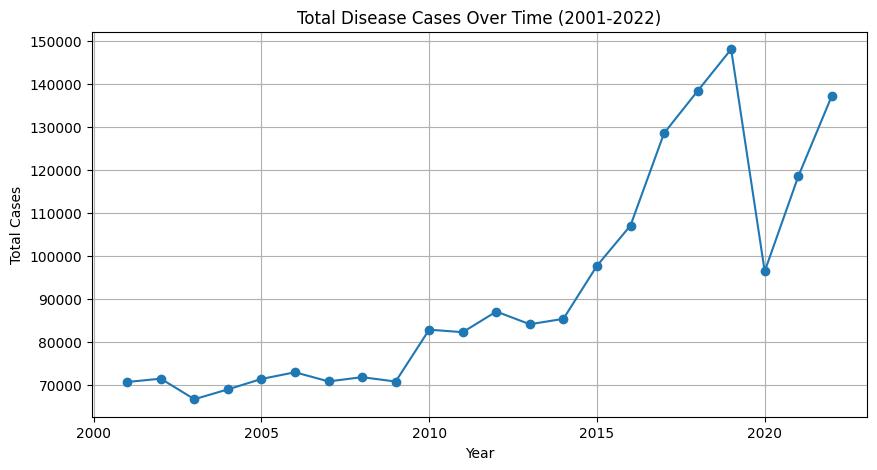

In [16]:
# Plot the trend line
plt.figure(figsize=(10, 5))
plt.plot(cases_by_year.index, cases_by_year.values, marker='o')
plt.title('Total Disease Cases Over Time (2001-2022)')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.grid()
plt.show()
# Group data by year and sex to compare male vs. female cases
gender_data = data[data['sex'].isin(['Male', 'Female'])].groupby(['year', 'sex'])['cases'].sum().unstack()

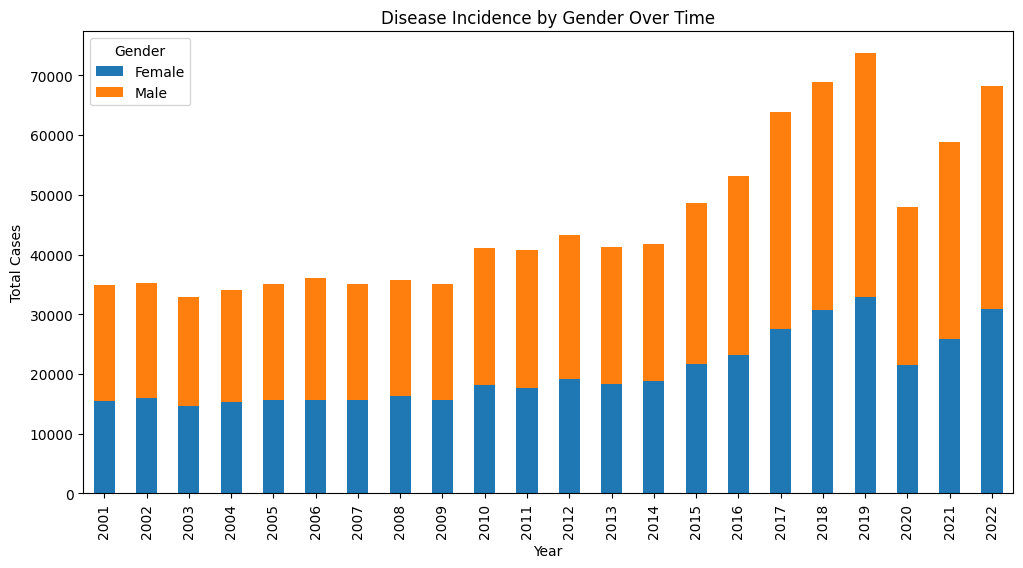

In [17]:
# Plot a stacked bar chart
gender_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Disease Incidence by Gender Over Time')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.legend(title='Gender')
plt.show()
# Group data by year and sex to compare male vs. female cases
gender_data = data[data['sex'].isin(['Male', 'Female'])].groupby(['year', 'sex'])['cases'].sum().unstack()

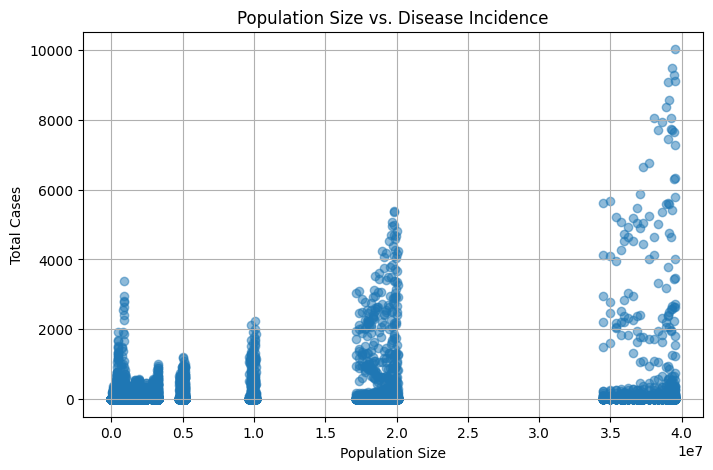

In [18]:
# Create a scatter plot to see the relationship between population size and total cases
plt.figure(figsize=(8, 5))
plt.scatter(data['population'], data['cases'], alpha=0.5)
plt.title('Population Size vs. Disease Incidence')
plt.xlabel('Population Size')
plt.ylabel('Total Cases')
plt.grid()
plt.show()